In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Character Level Language Model
predicts the next character in a sequence given a sequence of characters before it

In [3]:
words = open("names.txt").read().splitlines()

words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [9]:
len(words)

32033

In [10]:
min(len(w) for w in words)

2

In [11]:
max(len(w) for w in words)

15

In [ ]:
b

In [25]:
sorted(b.items(), key=lambda kv: kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [4]:
import torch

In [5]:
alphabet = sorted(list(set(''.join(words))))
alphabet.insert(0, '.')

stoi = {s:i for i, s in enumerate(alphabet)}
itos = {i:s for s,i in stoi.items()}

print(itos)


{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [6]:
N = torch.zeros((28, 28), dtype=torch.int32) # use ints

for w in words:
  chs = ['.'] + list(w) + ['.'] # Add beginning and ending markers
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1



(-0.5, 27.5, 27.5, -0.5)

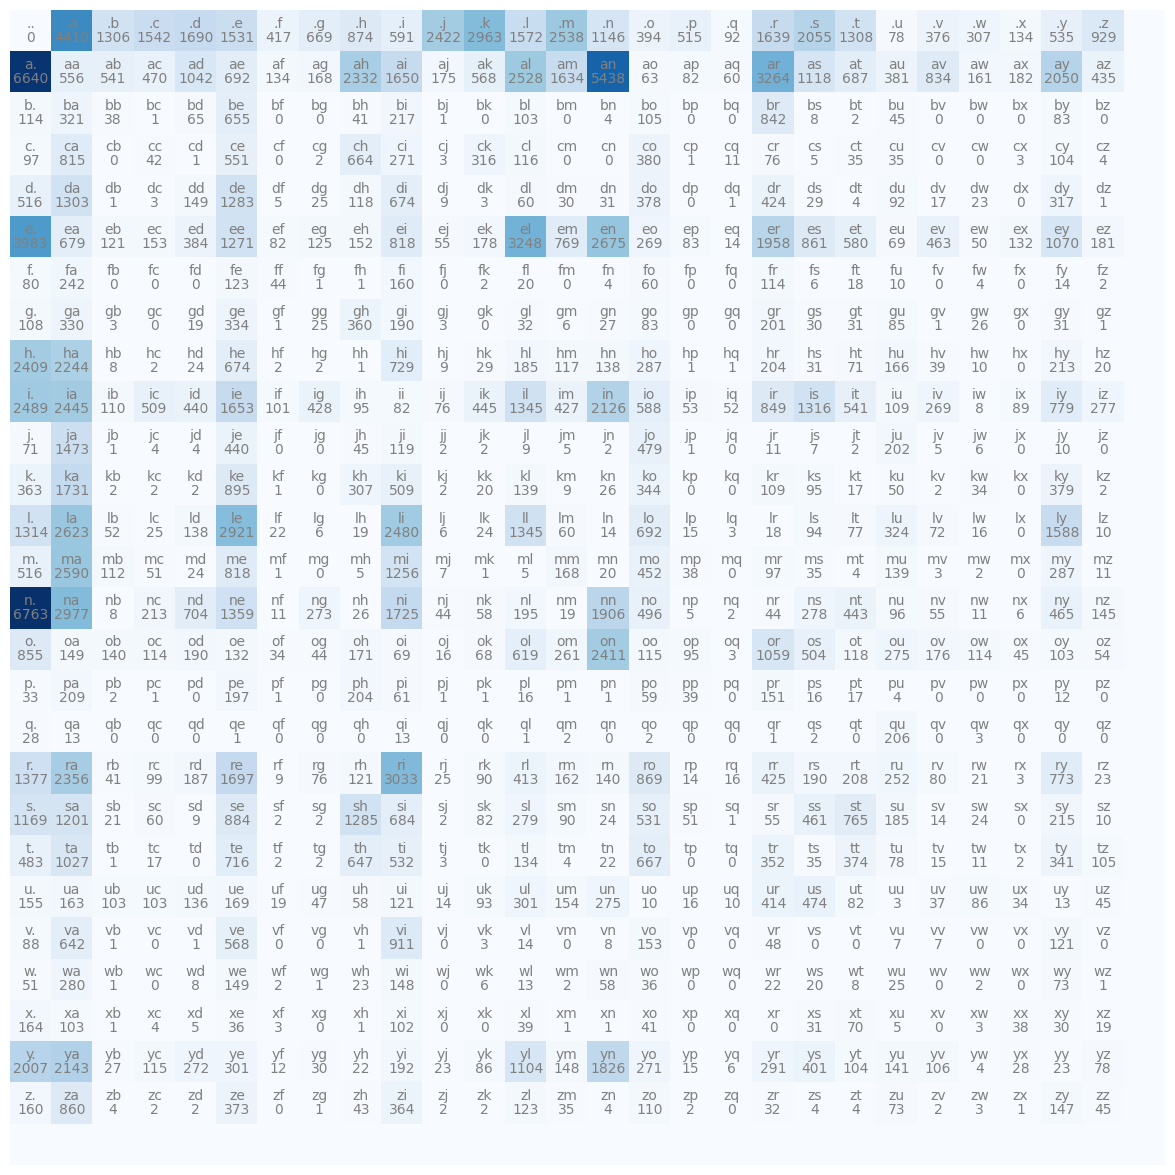

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 15))
plt.imshow(N, cmap='Blues')
for i in range(27):
  for j in range(27):
    bigram = itos[i] + itos[j]
    plt.text(j, i, bigram, ha='center', va='bottom', color='gray')
    plt.text(j,i, str(N[i,j].item()), ha='center', va='top', color='gray')
plt.axis('off')

In [15]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929,    0], dtype=torch.int32)

In [33]:
p = N[0].float()
p = p/p.sum()
p # p is the probability distribution of this particular row (based on the frequencies)

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

In [40]:
g = torch.Generator().manual_seed(214783647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix] # pick out a random bigram, conveniently they are also indexed so this will just get the second char
# checks out since m is pretty common following to '.'

'm'

In [62]:
g = torch.Generator().manual_seed(214743647)


for i in range(50):
  out = []

  ix = 0
  while True:
    p = N[ix].float() # get frequencies for this row (each row is all bigrams starting with ix)
    p = p / p.sum() # make into probabilities
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0: # ending .
      break
  print(''.join(out))

ta.
szloon.
zisonllibeleme.
dyzereewyill.
jedra.
sh.
le.
myahuzyi.
tlbydd.
osiani.
rdromziaimoshan.
ke.
ahelyn.
dayn.
tynalolleee.
mavanjallyn.
jah.
staasomio.
usi.
ckayo.
c.
rija.
gebrarosweadena.
me.
malaivrln.
dolyan.
ahuchey.
tyaneeildaynereri.
jer.
kondan.
e.
kastolitiles.
br.
jai.
ch.
ylanaran.
kalinvel.
d.
animorontlika.
mianamah.
bl.
mi.
jo.
aselaban.
crcerisavettanocev.
kalyaurosian.
ja.
rlioryllyryacan.
pona.
n.
